# NUMERICAL STUDY

In [1]:
import pandas as pd
import numpy as np
import os

path_original_data = r"C:\Users\Usuario\Documents\FOLDER_JupyterNotebook\unimi_files\SMML"
database = pd.read_csv(os.path.join(path_original_data, 'numerical_metrics.csv'), low_memory=False)
database_copy = database.copy()

# Step 1: Input the column name
# In this case, the column is set to 'ABMSE'
search_column = 'ABMSE' 

# Step 2: Extract rows where 'Model' column contains 'reference'
# The DataFrame 'reference_rows' will contain only the rows where the 'Model' column contains the word 'reference'
reference_rows = database[database['Model'].str.contains('reference', case=False, na=False)]

# Step 3: Find the row with the smallest value in the specified input column
# The 'idxmin()' method finds the index of the row with the smallest value in the specified column
# The 'loc' method is then used to retrieve the entire row based on the index
# The row with the smallest value in the specified column is stored in 'best_reference'
best_reference = reference_rows.loc[reference_rows[search_column].idxmin()]

# Step 4: Print the result
# The 'Model' column and the specified input column value (e.g., 'ABMSE') from the row are printed
print(f'{best_reference["Model"]} ({search_column}): {best_reference[search_column]}')

# This step shows a preview of the extracted rows where the 'Model' column contains 'reference'
reference_rows.head()

Scaled reference (ABMSE): 18.473869139226927


,Model,Lambda,MSE,ABMSE,R2_score
6,Unscaled reference,1.0,490.923208,18.474096,0.024511
13,Scaled reference,1.0,490.924826,18.473869,0.024508
20,Scaled skewed reference,1.0,491.063570,18.522671,0.024232
27,Automatic scale uncorrelated reference,1.0,490.924826,18.473869,0.024508


# Difference between manual and automatic scaling

In [2]:
# Create a copy of the DataFrame 'database' and store it in 'dfexp'
dfexp = database.copy()

# Drop all rows in 'dfexp' that do not contain 'Automatic' or 'Manual' in the 'Model' column
dfexp = dfexp[dfexp['Model'].str.contains('Automatic|Manual', case=False, na=False)]

# Drop all rows in 'dfexp' that contain the words 'reference', 'skewed', or 'uncorrelated' in the 'Model' column
dfexp = dfexp[~dfexp['Model'].str.contains('reference|skewed|uncorrelated', case=False, na=False)]

# Sort 'dfexp' by the 'Lambda' column in ascending order
dfexp = dfexp.sort_values(by='Lambda')

# Find unique 'Lambda' values in 'dfexp'
unique_lambdas = dfexp['Lambda'].unique()

# Display the rows with the same 'Lambda' value in batches
for lambda_value in unique_lambdas:
    print(f"Lambda value: {lambda_value}")
    # Print the rows in 'dfexp' where the 'Lambda' column matches the current 'lambda_value'
    print(dfexp[dfexp['Lambda'] == lambda_value])
    print()


Lambda value: 0.01
                  Model  Lambda         MSE      ABMSE  R2_score
0      Manual scale set    0.01  490.924803  18.473862  0.024508
14  Automatic scale set    0.01  490.924803  18.473862  0.024508

Lambda value: 0.1
                  Model  Lambda         MSE      ABMSE  R2_score
1      Manual scale set     0.1  490.924805  18.473862  0.024508
15  Automatic scale set     0.1  490.924805  18.473862  0.024508

Lambda value: 1.0
                  Model  Lambda         MSE      ABMSE  R2_score
2      Manual scale set     1.0  490.924826  18.473869  0.024508
16  Automatic scale set     1.0  490.924826  18.473869  0.024508

Lambda value: 10.0
                  Model  Lambda         MSE      ABMSE  R2_score
3      Manual scale set    10.0  490.925033  18.473937  0.024507
17  Automatic scale set    10.0  490.925033  18.473937  0.024507

Lambda value: 100.0
                  Model  Lambda         MSE      ABMSE  R2_score
4      Manual scale set   100.0  490.927148  18.474620  0

### Graphical representation of the effect of 'Lambda'

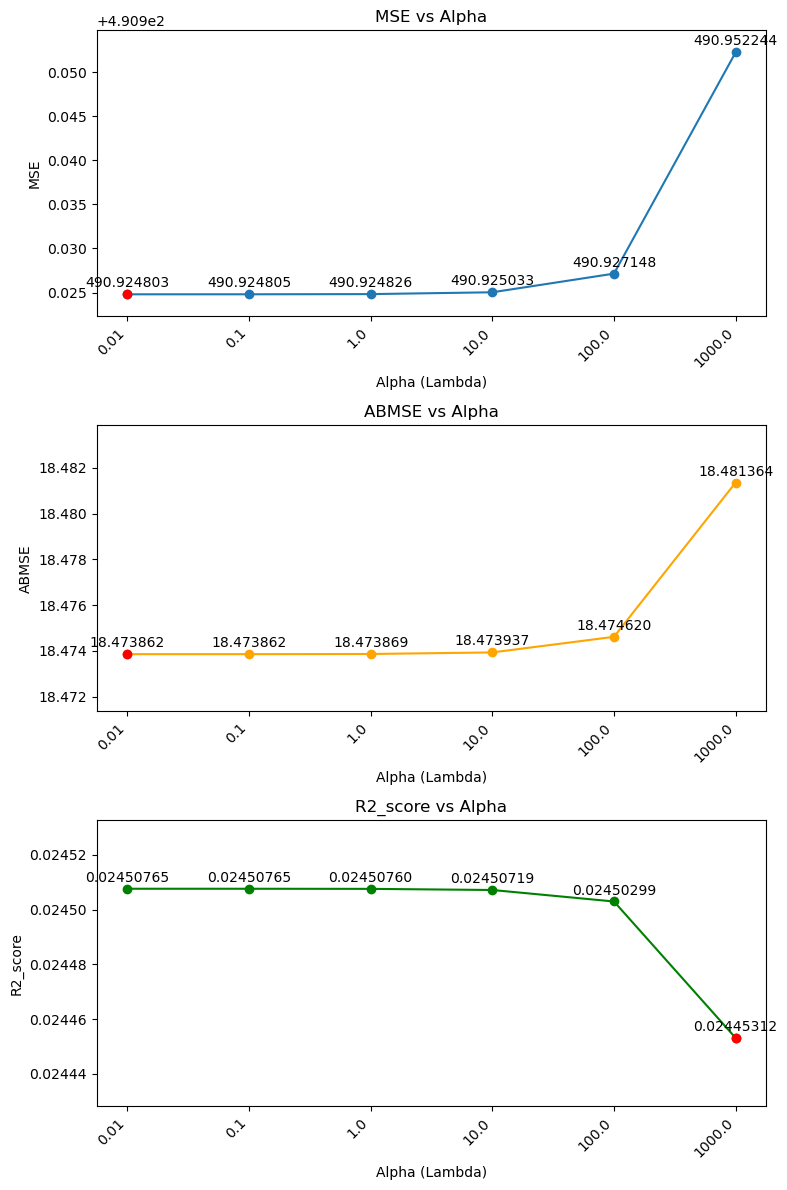

In [3]:
# Input data
search_name = 'Manual scale set'

# Step 1: Filter the 'database' DataFrame
# Remove rows containing 'reference' in the 'Model' column
database = database[~database['Model'].str.contains('reference', case=False, na=False)]

# Keep rows where 'Model' column contains 'search_name'
database = database[database['Model'].str.contains(search_name, case=False, na=False)]

# Display the first few rows of the filtered DataFrame 'database'
database.head()

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Set plot parameters
margin = 0.0025
r2_compensation = 100
y_text = 5

# Extract data for plotting
alphas = database['Lambda'].astype(str)
MSE_values = database['MSE']
ABMSE_values = database['ABMSE']
R2_score_values = database['R2_score']

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(8, 4*3))

# Plot for MSE
axes[0].plot(alphas, MSE_values, marker='o')
# Set plot labels and title
axes[0].set_xticks(range(len(alphas)))
axes[0].set_xticklabels(alphas, rotation=45, ha='right')
axes[0].set_xlabel('Alpha (Lambda)')
axes[0].set_ylabel('MSE')
axes[0].set_title('MSE vs Alpha')
# Set y-axis limits for better visualization of differences
axes[0].set_ylim(min(MSE_values) - margin, max(MSE_values) + margin)
# Find and mark the minimum MSE value with a different marker and text annotation
min_mse_index = MSE_values.idxmin()
axes[0].plot(alphas[min_mse_index], MSE_values[min_mse_index], marker='o', color='red')
for x, y in zip(alphas, MSE_values):
    axes[0].annotate(f'{y:.6f}', (x, y), textcoords="offset points", xytext=(0, y_text), ha='center')

# Plot for ABMSE
# (Similar operations as done for MSE)
axes[1].plot(alphas, ABMSE_values, marker='o', color='orange')
axes[1].set_xticks(range(len(alphas)))
axes[1].set_xticklabels(alphas, rotation=45, ha='right')
axes[1].set_xlabel('Alpha (Lambda)')
axes[1].set_ylabel('ABMSE')
axes[1].set_title('ABMSE vs Alpha')
axes[1].set_ylim(min(ABMSE_values) - margin, max(ABMSE_values) + margin)
min_abmse_index = ABMSE_values.idxmin()
axes[1].plot(alphas[min_abmse_index], ABMSE_values[min_abmse_index], marker='o', color='red')
for x, y in zip(alphas, ABMSE_values):
    axes[1].annotate(f'{y:.6f}', (x, y), textcoords="offset points", xytext=(0, y_text), ha='center')

# Plot for R2_score
# (Similar operations as done for MSE and ABMSE)
axes[2].plot(alphas, R2_score_values, marker='o', color='green')
axes[2].set_xticks(range(len(alphas)))
axes[2].set_xticklabels(alphas, rotation=45, ha='right')
axes[2].set_xlabel('Alpha (Lambda)')
axes[2].set_ylabel('R2_score')
axes[2].set_title('R2_score vs Alpha')
axes[2].set_ylim(min(R2_score_values) - margin/r2_compensation, max(R2_score_values) + margin/r2_compensation)
min_r2score_index = R2_score_values.idxmin()
axes[2].plot(alphas[min_r2score_index], R2_score_values[min_r2score_index], marker='o', color='red')
for x, y in zip(alphas, R2_score_values):
    axes[2].annotate(f'{y:.8f}', (x, y), textcoords="offset points", xytext=(0, y_text), ha='center')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

### Comparision of different techniques

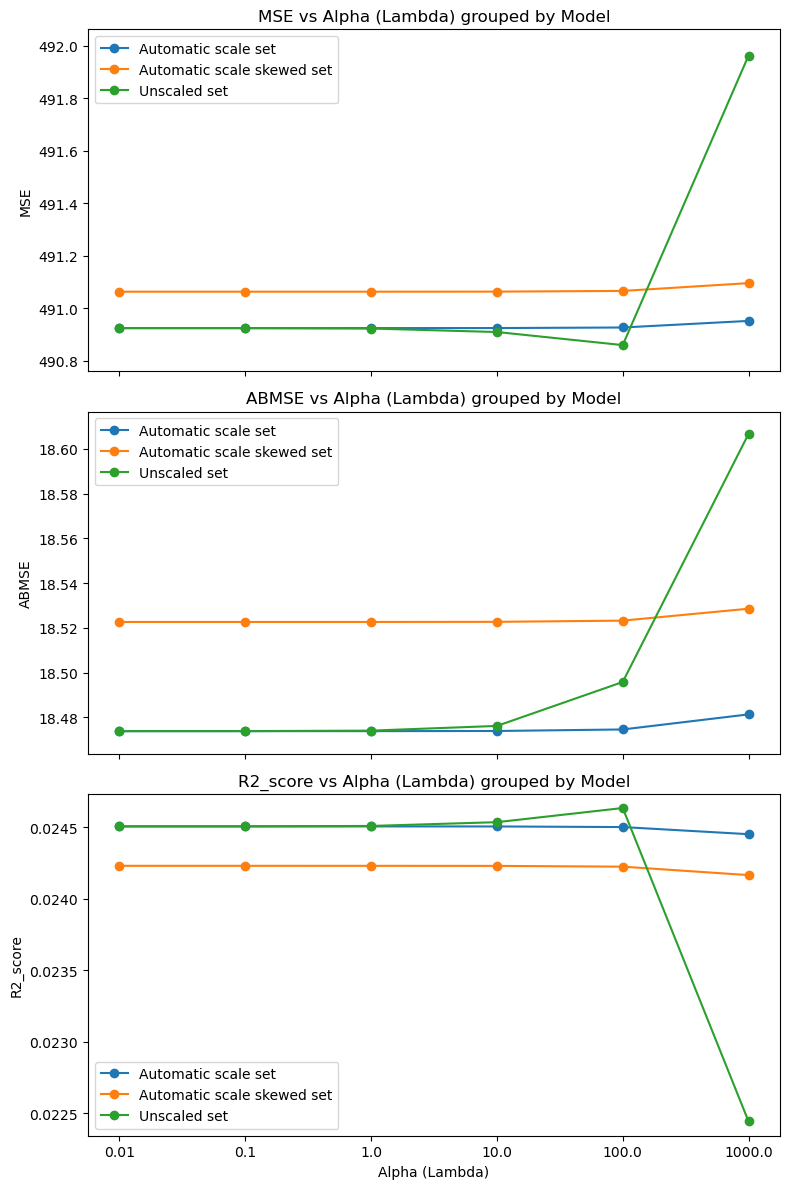

In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

df = database_copy.copy()
# Remove rows containing 'reference' in the 'Model' column
df = df[~df['Model'].str.contains('reference|Manual', case=False, na=False)]

# Define margins for each column after 'Lambda'
margins_list = [0.1, 0.01, 0.0001]  # You can adjust these margins as needed for each column

# Group the data by 'Model'
grouped_data = df.groupby('Model')

# Get the columns to plot after 'Lambda'
columns_to_plot = df.columns[df.columns.get_loc('Lambda') + 1:]

# Create subplots for each column
num_plots = len(columns_to_plot)
fig, axes = plt.subplots(num_plots, 1, figsize=(8, 4*num_plots), sharex=True)

# Loop through each column after 'Lambda' and plot the data for each unique 'Model' group
for idx, column in enumerate(columns_to_plot):
    # Plot the values based on alphas in the column (y-axis) and Lambda column (x-axis) for each group
    for name, group in grouped_data:
        axes[idx].plot(group['Lambda'].astype(str), group[column], marker='o', label=name)

    # Set y-axis label and plot title
    axes[idx].set_ylabel(column)
    axes[idx].set_title(f'{column} vs Alpha (Lambda) grouped by Model')
    axes[idx].legend()

    # Set y-axis limits for better visualization of differences
    margin = margins_list[idx] if idx < len(margins_list) else 0.05
    axes[idx].set_ylim(min(df[column]) - margin, max(df[column]) + margin)

# Set the common x-axis label
axes[-1].set_xlabel('Alpha (Lambda)')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

### Double-check with different sets

In [5]:
import pandas as pd
import numpy as np
import os

path_original_data = r"C:\Users\Usuario\Documents\FOLDER_JupyterNotebook\unimi_files\SMML"
database = pd.read_csv(os.path.join(path_original_data, 'numerical_metrics_alternative.csv'), low_memory=False)
database_copy = database.copy()

search_column = 'ABMSE'
reference_rows = database[database['Model'].str.contains('Testing set reference', case=False, na=False)]
best_reference = reference_rows.loc[reference_rows[search_column].idxmin()]
print(f'{best_reference["Model"]} ({search_column}): {best_reference[search_column]} - Training set: {best_reference["Distribution"]}')

reference_rows.head()

Testing set reference (ABMSE): 18.365043734906354 - Training set: 3.0


,Model,Lambda,MSE,ABMSE,R2_score,Distribution
0,Testing set reference,1.0,489.919335,18.457682,0.019032,2.0
13,Testing set reference,1.0,486.115361,18.365044,0.023763,3.0
26,Testing set reference,1.0,486.979804,18.368686,0.023623,4.0
39,Corrected testing set reference,1.0,489.919335,18.457682,0.019032,2.0


### Data comparision of the different distributions

In [6]:
# Create a copy of the 'database' DataFrame to avoid modifying the original data
dfexp = database.copy()

# Drop all rows containing the words 'reference' or 'Uncorrelated' in the 'Model' column
# The tilde (~) is used to negate the condition, so we keep only rows that do not contain these words
dfexp = dfexp[~dfexp['Model'].str.contains('reference|Corrected', case=False, na=False)]

# Order the DataFrame 'dfexp' by the values in the 'Lambda' column in ascending order
dfexp = dfexp.sort_values(by='Lambda')

# Get the unique values of 'Lambda' to group the rows with the same 'Lambda' value
unique_lambdas = dfexp['Lambda'].unique()

# Show the rows in batches that have the same 'Lambda' value and display their details
for lambda_value in unique_lambdas:
    print(f"Lambda value: {lambda_value}")
    # Extract rows from 'dfexp' that have the same 'Lambda' value using boolean indexing
    print(dfexp[dfexp['Lambda'] == lambda_value])
    print()

Lambda value: 0.01
          Model  Lambda         MSE      ABMSE  R2_score  Distribution
1   Testing set    0.01  489.919399  18.457676  0.019031           2.0
27  Testing set    0.01  486.979793  18.368679  0.023623           4.0
14  Testing set    0.01  486.115363  18.365036  0.023763           3.0

Lambda value: 0.05
          Model  Lambda         MSE      ABMSE  R2_score  Distribution
2   Testing set    0.05  489.919397  18.457676  0.019031           2.0
28  Testing set    0.05  486.979794  18.368679  0.023623           4.0
15  Testing set    0.05  486.115363  18.365037  0.023763           3.0

Lambda value: 0.1
          Model  Lambda         MSE      ABMSE  R2_score  Distribution
3   Testing set     0.1  489.919393  18.457677  0.019032           2.0
29  Testing set     0.1  486.979794  18.368680  0.023623           4.0
16  Testing set     0.1  486.115363  18.365037  0.023763           3.0

Lambda value: 0.5
          Model  Lambda         MSE      ABMSE  R2_score  Distribution


#### Graphical representation of the different distributions

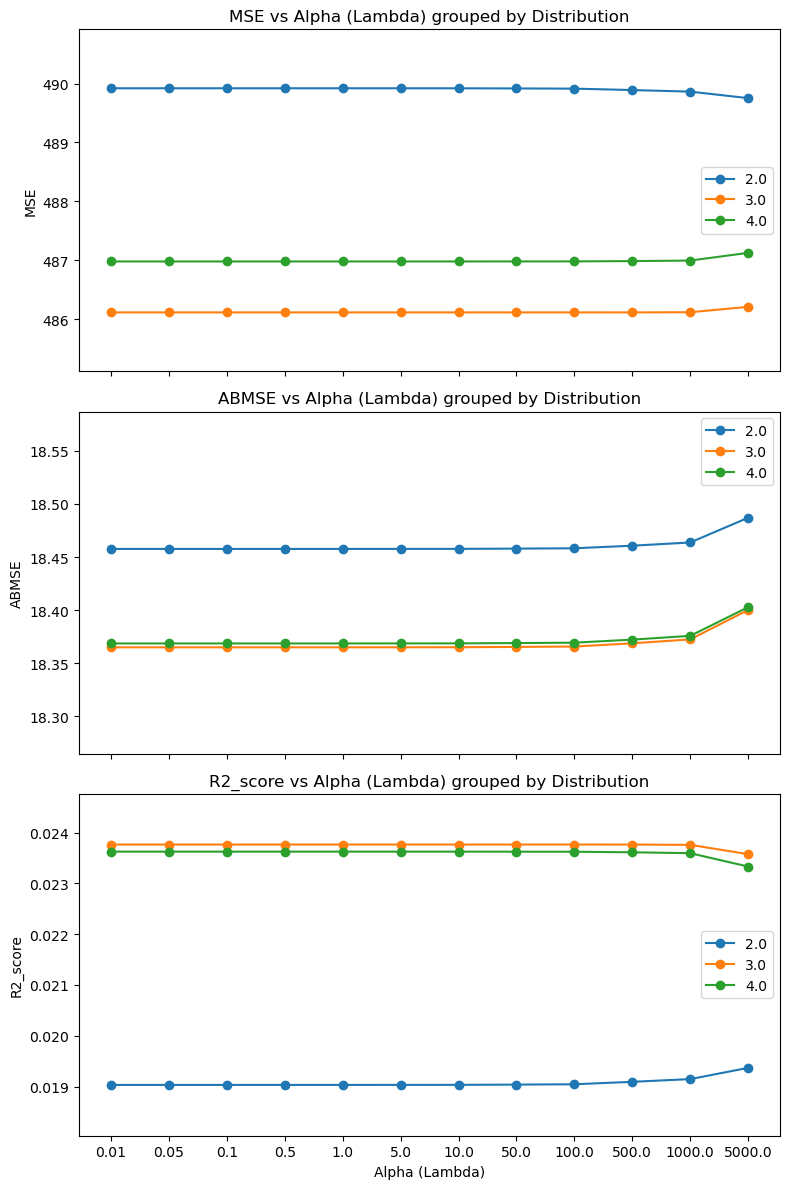

In [13]:
# Create a copy of the 'database_copy' DataFrame to avoid modifying the original data
df = database_copy[~database_copy['Model'].str.contains('reference|Corrected', case=False, na=False)]

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Define the margins to adjust the y-axis limits for each column after 'Lambda' in the plot
margins_list = [1, 0.1, 0.001]

# Assuming 'df' contains your DataFrame

# Group the data by the 'Distribution' column
grouped_data = df.groupby('Distribution')

# Get the columns to plot after 'Lambda'
columns_to_plot = df.columns[df.columns.get_loc('Lambda') + 1:df.columns.get_loc('Distribution')]

# Create subplots for each column
num_plots = len(columns_to_plot)
fig, axes = plt.subplots(num_plots, 1, figsize=(8, 4*num_plots), sharex=True)

# Loop through each column to create separate plots for each
for idx, column in enumerate(columns_to_plot):
    # Plot the values based on 'Lambda' (x-axis) and the column (y-axis) for each group in 'Distribution'
    for name, group in grouped_data:
        axes[idx].plot(group['Lambda'].astype(str), group[column], marker='o', label=name)

    axes[idx].set_ylabel(column)
    axes[idx].set_title(f'{column} vs Alpha (Lambda) grouped by Distribution')
    axes[idx].legend()

    # Set y-axis limits for better visualization of differences
    margin = margins_list[idx] if idx < len(margins_list) else 0.05
    axes[idx].set_ylim(min(df[column]) - margin, max(df[column]) + margin)

# Set the common x-axis label
axes[-1].set_xlabel('Alpha (Lambda)')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

### Confirm effect of removing correlated features

Lambda value: 0.01
                    Model  Lambda         MSE      ABMSE  R2_score  \
1             Testing set    0.01  489.919399  18.457676  0.019031   
40  Corrected testing set    0.01  490.011085  18.463014  0.018848   

    Distribution  
1            2.0  
40           2.0  

Lambda value: 0.05
                    Model  Lambda         MSE      ABMSE  R2_score  \
2             Testing set    0.05  489.919397  18.457676  0.019031   
41  Corrected testing set    0.05  490.011082  18.463014  0.018848   

    Distribution  
2            2.0  
41           2.0  

Lambda value: 0.1
                    Model  Lambda         MSE      ABMSE  R2_score  \
3             Testing set     0.1  489.919393  18.457677  0.019032   
42  Corrected testing set     0.1  490.011079  18.463015  0.018848   

    Distribution  
3            2.0  
42           2.0  

Lambda value: 0.5
                    Model  Lambda         MSE      ABMSE  R2_score  \
4             Testing set     0.5  489.919367  18

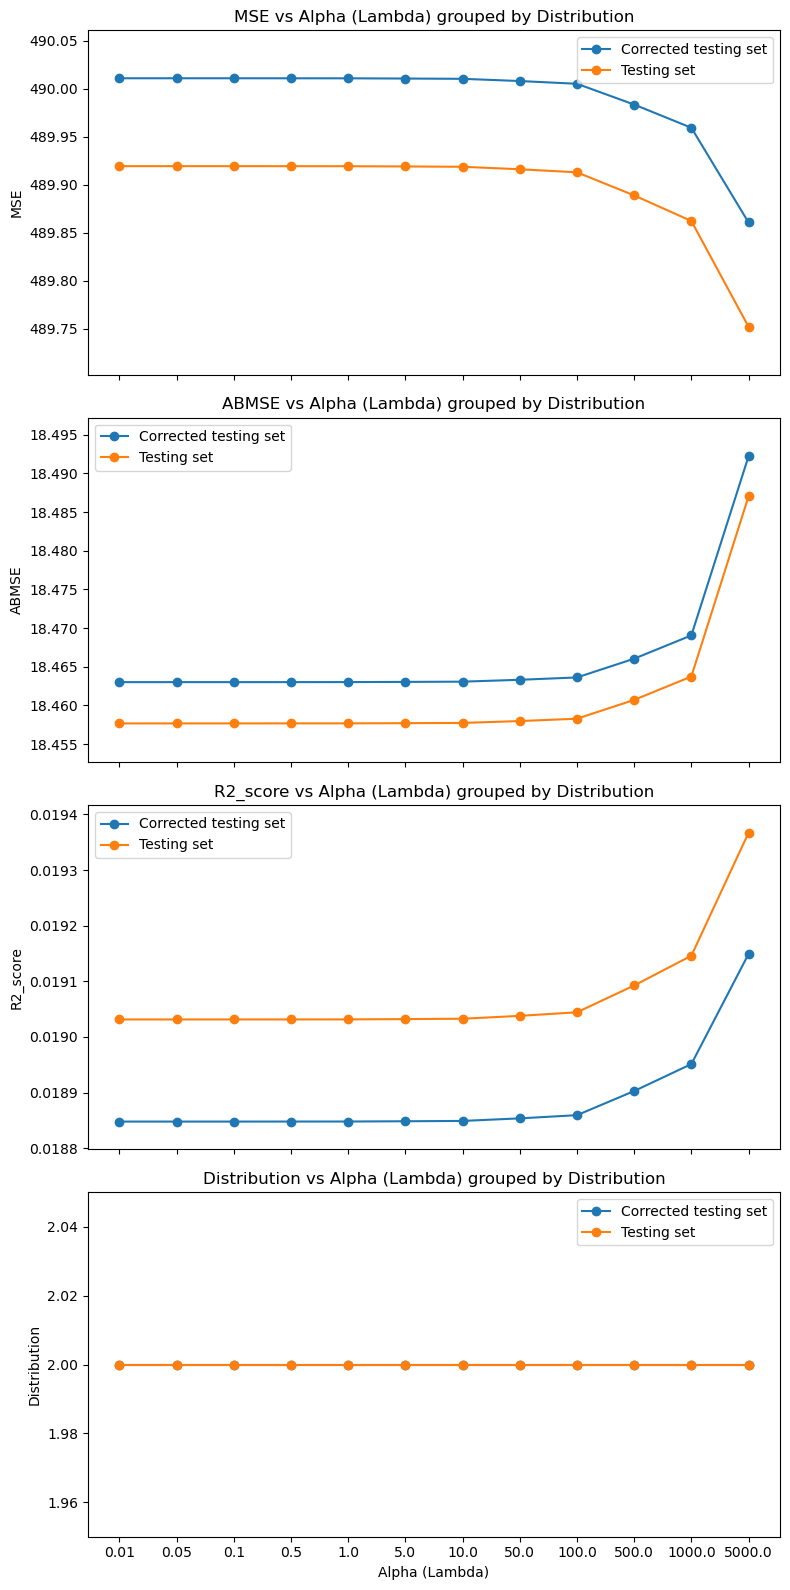

In [8]:
# Create a copy of the 'database' DataFrame to avoid modifying the original data
dfexp = database.copy()

# Drop all rows containing the word 'reference' in the 'Model' column
dfexp = dfexp[~dfexp['Model'].str.contains('reference', case=False, na=False)]

# Drop all rows that don't have '2' in the 'Distribution' column
dfexp = dfexp[dfexp['Distribution'] == 2]

# Order 'dfexp' by the column 'Lambda'
dfexp = dfexp.sort_values(by='Lambda')

# Show in batches the rows that have the same 'Lambda' value
unique_lambdas = dfexp['Lambda'].unique()
for lambda_value in unique_lambdas:
    print(f"Lambda value: {lambda_value}")
    print(dfexp[dfexp['Lambda'] == lambda_value])
    print()

# Create a new DataFrame 'df' as a copy of 'dfexp'
df = dfexp.copy()

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Define the margins to adjust the y-axis limits for each column after 'Lambda' in the plot
margins_list = [0.05, 0.005, 0.00005]

# Group the data by the 'Model' column
grouped_data = df.groupby('Model')

# Get the columns to plot after 'Lambda'
columns_to_plot = df.columns[df.columns.get_loc('Lambda') + 1:]

# Create subplots for each column
num_plots = len(columns_to_plot)
fig, axes = plt.subplots(num_plots, 1, figsize=(8, 4*num_plots), sharex=True)

# Loop through each column to create separate plots for each
for idx, column in enumerate(columns_to_plot):
    # Plot the values based on 'Lambda' (x-axis) and the column (y-axis) for each group in 'Model'
    for name, group in grouped_data:
        axes[idx].plot(group['Lambda'].astype(str), group[column], marker='o', label=name)

    axes[idx].set_ylabel(column)
    axes[idx].set_title(f'{column} vs Alpha (Lambda) grouped by Distribution')
    axes[idx].legend()

    # Set y-axis limits for better visualization of differences
    margin = margins_list[idx] if idx < len(margins_list) else 0.05
    axes[idx].set_ylim(min(df[column]) - margin, max(df[column]) + margin)

# Set the common x-axis label for all subplots
axes[-1].set_xlabel('Alpha (Lambda)')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


# CATEGORIAL STUDY

In [9]:
import pandas as pd
import numpy as np
import os

path_original_data = r"C:\Users\Usuario\Documents\FOLDER_JupyterNotebook\unimi_files\SMML"

# Confirmation of correlation effect on results

Lambda value: 0.01
                        Model  Lambda       MSE     ABMSE  R2_score
1   Base-N encoding corrected    0.01  0.046533  0.177774  0.075356
14            Base-N encoding    0.01  0.041907  0.168533  0.167277

Lambda value: 0.05
                        Model  Lambda       MSE     ABMSE  R2_score
2   Base-N encoding corrected    0.05  0.046533  0.177774  0.075356
15            Base-N encoding    0.05  0.041907  0.168533  0.167277

Lambda value: 0.1
                        Model  Lambda       MSE     ABMSE  R2_score
3   Base-N encoding corrected     0.1  0.046533  0.177774  0.075357
16            Base-N encoding     0.1  0.041907  0.168534  0.167278

Lambda value: 0.5
                        Model  Lambda       MSE     ABMSE  R2_score
4   Base-N encoding corrected     0.5  0.046533  0.177775  0.075358
17            Base-N encoding     0.5  0.041907  0.168535  0.167279

Lambda value: 1.0
                        Model  Lambda       MSE     ABMSE  R2_score
5   Base-N encoding 

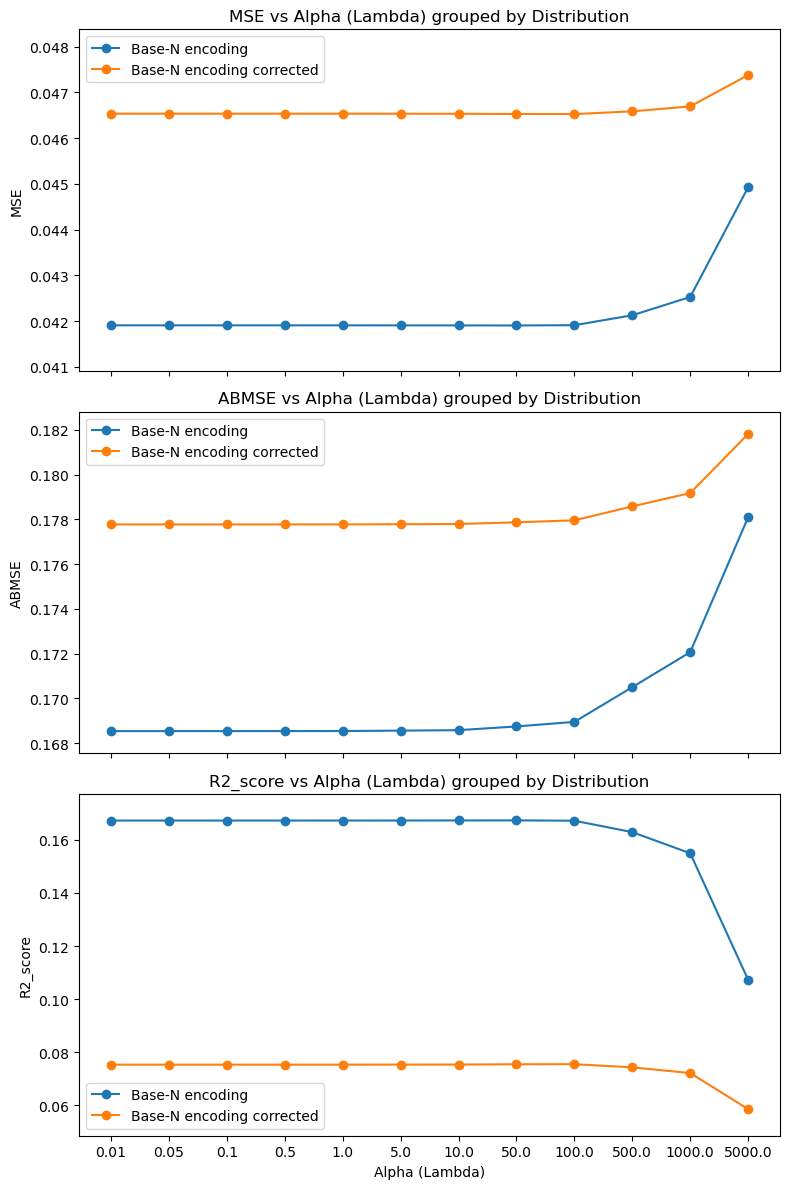

In [15]:
df = pd.read_csv(os.path.join(path_original_data, 'categorical_metrics.csv'), low_memory=False)

encoding = 'Base-N'

df = df[~df['Model'].str.contains('reference', case=False, na=False)]
df = df[df['Model'].str.contains(encoding, case=False, na=False)]

dfexp = df.sort_values(by='Lambda')

# Show in batches the rows that have the same 'Lambda' value
unique_lambdas = dfexp['Lambda'].unique()
for lambda_value in unique_lambdas:
    print(f"Lambda value: {lambda_value}")
    print(dfexp[dfexp['Lambda'] == lambda_value])
    print()

import pandas as pd
import matplotlib.pyplot as plt

margins_list = [0.001, 0.001, 0.01]

grouped_data = df.groupby('Model')

columns_to_plot = df.columns[df.columns.get_loc('Lambda') + 1:]

num_plots = len(columns_to_plot)
fig, axes = plt.subplots(num_plots, 1, figsize=(8, 4*num_plots), sharex=True)

for idx, column in enumerate(columns_to_plot):
    for name, group in grouped_data:
        axes[idx].plot(group['Lambda'].astype(str), group[column], marker='o', label=name)

    axes[idx].set_ylabel(column)
    axes[idx].set_title(f'{column} vs Alpha (Lambda) grouped by Distribution')
    axes[idx].legend()

    # Set y-axis limits for better visualization of differences
    margin = margins_list[idx] if idx < len(margins_list) else 0.05
    axes[idx].set_ylim(min(df[column]) - margin, max(df[column]) + margin)

# Set the common x-axis label
axes[-1].set_xlabel('Alpha (Lambda)')

plt.tight_layout()
plt.show()

# Comparision of different encoding techniques

In [11]:
df = pd.read_csv(os.path.join(path_original_data, 'categorical_metrics.csv'), low_memory=False)

df = df[~df['Model'].str.contains('reference|corrected', case=False, na=False)]

dfexp = df.sort_values(by='Lambda')

# Show in batches the rows that have the same 'Lambda' value
unique_lambdas = dfexp['Lambda'].unique()
for lambda_value in unique_lambdas:
    print(f"Lambda value: {lambda_value}")
    print(dfexp[dfexp['Lambda'] == lambda_value])
    print()

Lambda value: 0.01
              Model  Lambda       MSE     ABMSE  R2_score
14  Base-N encoding    0.01  0.041907  0.168533  0.167277
40  Target encoding    0.01  0.002039  0.024356  0.959487
27   Label encoding    0.01  0.048859  0.184199  0.029150

Lambda value: 0.05
              Model  Lambda       MSE     ABMSE  R2_score
15  Base-N encoding    0.05  0.041907  0.168533  0.167277
41  Target encoding    0.05  0.002039  0.024356  0.959487
28   Label encoding    0.05  0.048859  0.184199  0.029150

Lambda value: 0.1
              Model  Lambda       MSE     ABMSE  R2_score
16  Base-N encoding     0.1  0.041907  0.168534  0.167278
42  Target encoding     0.1  0.002039  0.024357  0.959487
29   Label encoding     0.1  0.048859  0.184199  0.029150

Lambda value: 0.5
              Model  Lambda       MSE     ABMSE  R2_score
17  Base-N encoding     0.5  0.041907  0.168535  0.167279
43  Target encoding     0.5  0.002039  0.024360  0.959486
30   Label encoding     0.5  0.048859  0.184200  0.02